In [2]:

from google.colab import files
myfile = files.upload()

TypeError: ignored

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tensorflow import keras

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
cd /content/drive/MyDrive/코랩으로 한 번 해보자/22-01-05 프로젝트/입력 변수

/content/drive/MyDrive/코랩으로 한 번 해보자/22-01-05 프로젝트/입력 변수


동행지수 = pd.read_csv('경기동행지수_2007~2020.csv', encoding = 'CP949')
나스닥 = pd.read_csv('나스닥종합지수 2007~2020.csv', encoding = 'CP949')
다우존스 = pd.read_csv('다우존스 2007~2020.csv', encoding = 'CP949')
물가지수1 = pd.read_csv('생산자물가지수 2007~2020.csv', encoding= 'CP949')
물가지수2 = pd.read_csv('소비자물가지수 2007~2020.csv', encoding= 'CP949')
거래현황 = pd.read_csv('소비자물가지수 2007~2020.csv', encoding= 'CP949')
지가변동 = pd.read_csv('지가변동률_2007~2020.csv', encoding= 'CP949')
코스피 = pd.read_csv('코스피지수 2007~2020.csv', encoding= 'CP949')

In [8]:
df = pd.read_csv('data_final.csv', encoding = 'CP949')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        3525 non-null   object 
 1   실거래가(평균)  3525 non-null   float64
 2   나스닥       3525 non-null   float64
 3   다우존스      3525 non-null   float64
 4   코스피       3525 non-null   float64
 5   지가변동률     3525 non-null   float64
 6   동행지수      3525 non-null   float64
 7   소비자물가지수   3525 non-null   float64
 8   생산자물가     3525 non-null   float64
 9   거래량       3525 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 275.5+ KB


In [ ]:
df.head()

,날짜,실거래가(평균),나스닥,다우존스,코스피,지가변동률,동행지수,소비자물가지수,생산자물가,거래량
0,2007년 01월 03일,398.9,2423.2,12474.52,1363.09,0.517,81.0,75.814,86.54,156
1,2007년 01월 04일,398.9,2453.4,12480.69,1363.09,0.517,81.0,75.814,86.54,156
2,2007년 01월 05일,398.9,2434.3,12398.01,1374.34,0.517,81.0,75.814,86.54,156
3,2007년 01월 08일,398.9,2438.2,12423.49,1435.26,0.517,81.0,75.814,86.54,156
4,2007년 01월 09일,398.9,2443.8,12416.60,1435.26,0.517,81.0,75.814,86.54,156


In [10]:
import locale
A = '111,111.222'
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

locale.atof(A)

locale.atof('111,111')


111111.0

In [ ]:


# 천 단위 넘어가서 1,000 이런식으로 나오는 건 문자열 처리로 되서 이 함수로 float 형식으로 바꿔준다.
df['나스닥'] = df['나스닥'].apply(lambda x : float(x.split()[0].replace(',','')))
df['코스피'] = df['코스피'].apply(lambda x : float(x.split()[0].replace(',','')))




In [ ]:
df.head()

,날짜,실거래가(평균),나스닥,다우존스,코스피,지가변동률,동행지수,소비자물가지수,생산자물가,거래량
0,2007년 01월 03일,398.9,2423.2,12474.52,1363.09,0.517,81.0,75.814,86.54,156
1,2007년 01월 04일,398.9,2453.4,12480.69,1363.09,0.517,81.0,75.814,86.54,156
2,2007년 01월 05일,398.9,2434.3,12398.01,1374.34,0.517,81.0,75.814,86.54,156
3,2007년 01월 08일,398.9,2438.2,12423.49,1435.26,0.517,81.0,75.814,86.54,156
4,2007년 01월 09일,398.9,2443.8,12416.60,1435.26,0.517,81.0,75.814,86.54,156


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        3525 non-null   object 
 1   실거래가(평균)  3525 non-null   float64
 2   나스닥       3525 non-null   float64
 3   다우존스      3525 non-null   float64
 4   코스피       3525 non-null   float64
 5   지가변동률     3525 non-null   float64
 6   동행지수      3525 non-null   float64
 7   소비자물가지수   3525 non-null   float64
 8   생산자물가     3525 non-null   float64
 9   거래량       3525 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 275.5+ KB


In [11]:
df['날짜']=df['날짜'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl= r'', regex=True)


In [12]:
df.head()

,날짜,실거래가(평균),나스닥,다우존스,코스피,지가변동률,동행지수,소비자물가지수,생산자물가,거래량
0,2007 01 03,398.9,2423.2,12474.52,1363.09,0.517,81.0,75.814,86.54,156
1,2007 01 04,398.9,2453.4,12480.69,1363.09,0.517,81.0,75.814,86.54,156
2,2007 01 05,398.9,2434.3,12398.01,1374.34,0.517,81.0,75.814,86.54,156
3,2007 01 08,398.9,2438.2,12423.49,1435.26,0.517,81.0,75.814,86.54,156
4,2007 01 09,398.9,2443.8,12416.60,1435.26,0.517,81.0,75.814,86.54,156


In [13]:
df['날짜']=df['날짜'].str.replace(pat=r' ', repl= r'', regex=True)

In [14]:
df.astype(float)

,날짜,실거래가(평균),나스닥,다우존스,코스피,지가변동률,동행지수,소비자물가지수,생산자물가,거래량
0,20070103.0,398.9,2423.2,12474.52,1363.09,0.517,81.0,75.814,86.54,156.0
1,20070104.0,398.9,2453.4,12480.69,1363.09,0.517,81.0,75.814,86.54,156.0
2,20070105.0,398.9,2434.3,12398.01,1374.34,0.517,81.0,75.814,86.54,156.0
3,20070108.0,398.9,2438.2,12423.49,1435.26,0.517,81.0,75.814,86.54,156.0
4,20070109.0,398.9,2443.8,12416.60,1435.26,0.517,81.0,75.814,86.54,156.0
...,...,...,...,...,...,...,...,...,...,...
3520,20201224.0,1351.7,12804.7,30199.87,2806.86,0.437,94.5,100.270,103.90,243.0
3521,20201228.0,1351.7,12899.4,30403.97,2808.60,0.437,94.5,100.270,103.90,243.0
3522,20201229.0,1351.7,12850.2,30335.67,2820.51,0.437,94.5,100.270,103.90,243.0
3523,20201230.0,1351.7,12870.0,30409.56,2873.47,0.437,94.5,100.270,103.90,243.0


In [16]:
df['날짜']

0       20070103
1       20070104
2       20070105
3       20070108
4       20070109
          ...   
3520    20201224
3521    20201228
3522    20201229
3523    20201230
3524    20201231
Name: 날짜, Length: 3525, dtype: object

In [17]:
df = df.astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        3525 non-null   float64
 1   실거래가(평균)  3525 non-null   float64
 2   나스닥       3525 non-null   float64
 3   다우존스      3525 non-null   float64
 4   코스피       3525 non-null   float64
 5   지가변동률     3525 non-null   float64
 6   동행지수      3525 non-null   float64
 7   소비자물가지수   3525 non-null   float64
 8   생산자물가     3525 non-null   float64
 9   거래량       3525 non-null   float64
dtypes: float64(10)
memory usage: 275.5 KB


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


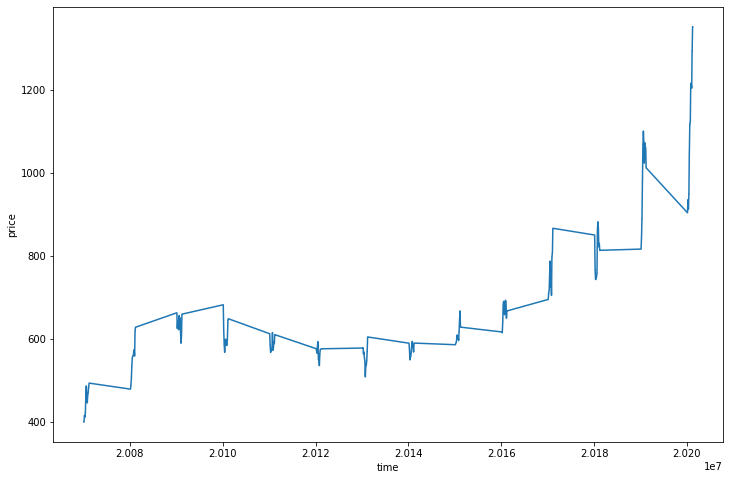

In [19]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(y=df['실거래가(평균)'], x=df['날짜'])
# sns.lineplot 그래프를 어떤 형식으로 할 건지 정하는 거라서 이걸 수정하는 편이 그래프 고치는 것 보다 쉽다.
plt.xlabel('time')

plt.ylabel('price')


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['날짜', '실거래가(평균)', '나스닥', '다우존스', '코스피', '지가변동률', '동행지수', '소비자물가지수', '생산자물가', '거래량']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

array([[0.00000000e+00, 0.00000000e+00, 9.92709014e-02, ...,
        0.00000000e+00, 0.00000000e+00, 2.44813278e-01],
       [7.62613629e-06, 0.00000000e+00, 1.01867455e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.44813278e-01],
       [1.52522726e-05, 0.00000000e+00, 1.00225264e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.44813278e-01],
       ...,
       [9.99984748e-01, 1.00000000e+00, 9.95769852e-01, ...,
        9.82721209e-01, 8.10836058e-01, 4.25311203e-01],
       [9.99992374e-01, 1.00000000e+00, 9.97472229e-01, ...,
        9.82721209e-01, 8.10836058e-01, 4.25311203e-01],
       [1.00000000e+00, 1.00000000e+00, 9.99045637e-01, ...,
        9.82721209e-01, 8.10836058e-01, 4.25311203e-01]])

In [80]:
df2 = pd.DataFrame(scaled, columns = scale_cols) #x_train_data

In [81]:
x_train = df2[ :1763].drop('실거래가(평균)', 1)

In [82]:
x_test = df2[1762: ].drop('실거래가(평균)', 1) # 확인용도 얼마나 정확한지

In [83]:
y_train = df2.loc[ :1763,['실거래가(평균)']] # loc는 drop 한 함수와 다르게 134 까지 포함 시킨다.

In [84]:
y_test = df2.loc[1764 : , ['실거래가(평균)']]

In [85]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 1764 to 3524
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   실거래가(평균)  1761 non-null   float64
dtypes: float64(1)
memory usage: 13.9 KB


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df.drop('실거래가', axis = 1), df['실거래가'], test_size=0.1, random_state=5,shuffle=False)

In [ ]:
# x_train.shape, y_train.shape

# 위에 나온 값을 토대로 확인 앞에 값이 제대로 나오는지 확인 ex)151 맞는지 x 값 9개 맞는지

In [ ]:
x_train

In [ ]:
y_test

In [109]:
import tensorflow as tf
WINDOW_SIZE=20 # 얼마동안의 기간을 학습해서 예측할 것인지
BATCH_SIZE=32


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [87]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):

# X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))

# y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [105]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis = -1)
    ds = tf.dat.Dataset.from_tensor_slics(series)
    ds = ds.window

In [107]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, False)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

TypeError: ignored

In [103]:
model = keras.Sequential([
# 1차원 feature map 생성
    keras.layers.Conv1D(filters=64, kernel_size=9, # x 변수값 만큼 size한다
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 9]),
# LSTM
    keras.layers.LSTM(128, activation='tanh'),
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()사용
loss = keras.losses.Huber()
optimizer = keras.optimizers.Adam(0.0005)
model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

In [104]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습 멈춤
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=35)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=100,
                    callbacks=[earlystopping])

Epoch 1/100
54/54 [==============================] - 46s 824ms/step - loss: 0.0410 - mse: 0.0821 - val_loss: 0.0786 - val_mse: 0.1571
Epoch 2/100
54/54 [==============================] - 4s 81ms/step - loss: 0.0051 - mse: 0.0101 - val_loss: 0.0792 - val_mse: 0.1585
Epoch 3/100
54/54 [==============================] - 4s 79ms/step - loss: 0.0031 - mse: 0.0061 - val_loss: 0.0778 - val_mse: 0.1556
Epoch 4/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0020 - mse: 0.0041 - val_loss: 0.0822 - val_mse: 0.1643
Epoch 5/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0015 - mse: 0.0029 - val_loss: 0.0831 - val_mse: 0.1662
Epoch 6/100
38/54 [====================>.........] - ETA: 0s - loss: 0.0013 - mse: 0.0026

KeyboardInterrupt: ignored

In [98]:
pred = model.predict(test_data)

In [99]:
pred.shape

(1721, 1)

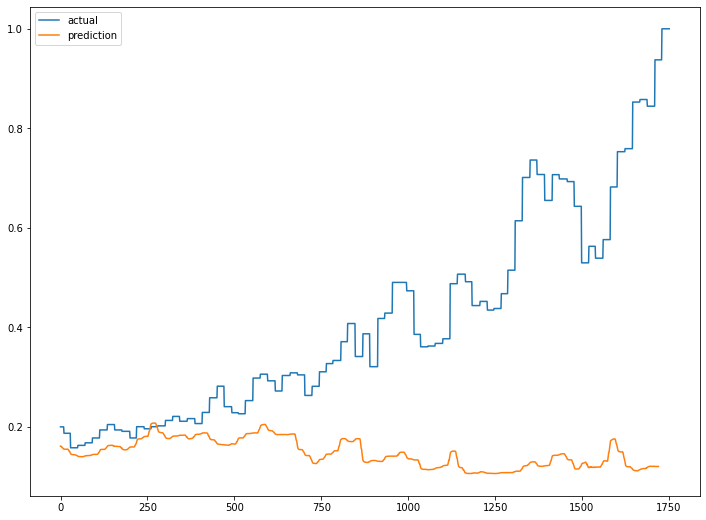

In [100]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[9:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, label = 'Train')
plt.plot(validation_history,label = 'Validation' )
plt.legend()

In [ ]:
trainPredict_dataset_like = np.zeros(shape=(len(pred), 10))
trainPredict_dataset_like[:,0] = pred[:, 0]
real_pred = scaler.inverse_transform(trainPredict_dataset_like)[:,0]
real_pred
